# 数据准备

In [32]:
import random
import numpy as np

# 设置 Python 内置 random 库的全局随机种子
random.seed(24)

# 设置 Numpy 库的全局随机种子
np.random.seed(24)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler

## 读取数据集文件

In [34]:
random_state=2024
filepath = "./seer_withoutmissing.csv"
# 读取数据集文件
raw = pd.read_csv(filepath)


raw

,Marital_status,Age,Race,Primary_site,Histology,Tumor_stage,Differentiation,PrimarySiteSurgeryType,RegionalLNSurgeryExtent,Radiotherapy,Chemotherapy,Tumor_size,CancerCountInSituMalignant,time,event
0,Single,50-59 years,White,Cervix uteri,Squamous Cell Carcinoma,Regional,Grade III (Poorly differentiated),Resection,Unknown or not applicable,No radiation or unknown,No/Unknown,<= 40mm,>1,60,0
1,Divorced,60-69 years,White,Cervix uteri,Squamous Cell Carcinoma,Regional,Grade III (Poorly differentiated),NoSurgery,NoLymphNodesRemoved,No radiation or unknown,Yes,> 40mm,>1,60,0
2,Married,40-49 years,White,Cervix uteri,Squamous Cell Carcinoma,Regional,Grade II (Moderately differentiated),Resection,NoLymphNodesRemoved,Radiation therapy,Yes,> 40mm,>1,33,1
3,Single,50-59 years,White,Cervix uteri,Squamous Cell Carcinoma,Localized,Grade III (Poorly differentiated),NoSurgery,NoLymphNodesRemoved,Radiation therapy,Yes,<= 40mm,>1,60,0
4,Single,50-59 years,White,Endocervix,Squamous Cell Carcinoma,Localized,Grade III (Poorly differentiated),NoSurgery,NoLymphNodesRemoved,Radiation therapy,Yes,<= 40mm,>1,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4689,Married,30-39 years,White,Endocervix,Adenosquamous Carcinoma,Regional,Grade I (Well differentiated),Resection,Lymph nodes removed,Radiation therapy,Yes,> 40mm,=1,60,0
4690,Married,40-49 years,White,Cervix uteri,Squamous Cell Carcinoma,Regional,Grade II (Moderately differentiated),NoSurgery,NoLymphNodesRemoved,Radiation therapy,Yes,> 40mm,=1,60,0
4691,Divorced,70+ years,Black,Cervix uteri,Squamous Cell Carcinoma,Localized,Grade III (Poorly differentiated),Resection,Lymph nodes removed,No radiation or unknown,No/Unknown,> 40mm,>1,60,0
4692,Married,60-69 years,Black,Cervix uteri,Squamous Cell Carcinoma,Regional,Grade II (Moderately differentiated),Resection,NoLymphNodesRemoved,Radiation therapy,Yes,<= 40mm,=1,5,1


In [35]:
import pandas as pd
from tabulate import tabulate

# raw[raw.select_dtypes(['object']).columns] = raw.select_dtypes(['object']).apply(lambda x: x.astype('category'))

# 创建一个新的DataFrame来保存需要的信息
info_raw = pd.DataFrame({
    'Column': raw.columns,
    'Dtype': raw.dtypes.values,
    'Non-Null Count': raw.count().values
})

print(tabulate(info_raw, headers='keys', tablefmt='pipe'))

|    | Column                     | Dtype   |   Non-Null Count |
|---:|:---------------------------|:--------|-----------------:|
|  0 | Marital_status             | object  |             4694 |
|  1 | Age                        | object  |             4694 |
|  2 | Race                       | object  |             4694 |
|  3 | Primary_site               | object  |             4694 |
|  4 | Histology                  | object  |             4694 |
|  5 | Tumor_stage                | object  |             4694 |
|  6 | Differentiation            | object  |             4694 |
|  7 | PrimarySiteSurgeryType     | object  |             4694 |
|  8 | RegionalLNSurgeryExtent    | object  |             4694 |
|  9 | Radiotherapy               | object  |             4694 |
| 10 | Chemotherapy               | object  |             4694 |
| 11 | Tumor_size                 | object  |             4694 |
| 12 | CancerCountInSituMalignant | object  |             4694 |
| 13 | time              

## 删失率

In [36]:
# 计算总的观察数
total_observations = len(raw)

# 计算删失的观察数
censored_observations = len(raw[raw['event'] == 0])

# 计算删失率
censoring_rate = censored_observations / total_observations

# 打印删失率
print(f"Censoring rate: {censoring_rate:.3f}")

Censoring rate: 0.747


In [37]:
raw['event']=raw['event'].astype(bool)

In [38]:
import pandas as pd
from tabulate import tabulate

raw[raw.select_dtypes(['object']).columns] = raw.select_dtypes(['object']).apply(lambda x: x.astype('category'))

# 创建一个新的DataFrame来保存需要的信息
info_raw = pd.DataFrame({
    'Column': raw.columns,
    'Dtype': raw.dtypes.values,
    'Non-Null Count': raw.count().values
})

print(tabulate(info_raw, headers='keys', tablefmt='pipe'))

|    | Column                     | Dtype    |   Non-Null Count |
|---:|:---------------------------|:---------|-----------------:|
|  0 | Marital_status             | category |             4694 |
|  1 | Age                        | category |             4694 |
|  2 | Race                       | category |             4694 |
|  3 | Primary_site               | category |             4694 |
|  4 | Histology                  | category |             4694 |
|  5 | Tumor_stage                | category |             4694 |
|  6 | Differentiation            | category |             4694 |
|  7 | PrimarySiteSurgeryType     | category |             4694 |
|  8 | RegionalLNSurgeryExtent    | category |             4694 |
|  9 | Radiotherapy               | category |             4694 |
| 10 | Chemotherapy               | category |             4694 |
| 11 | Tumor_size                 | category |             4694 |
| 12 | CancerCountInSituMalignant | category |             4694 |
| 13 | tim

## 五折分层数据划分

In [39]:
import pandas as pd
import pickle
from sklearn.model_selection import StratifiedKFold
import os


# 确定全局类别
category_columns = [col for col in raw.columns if raw[col].dtype.name == 'category' or col == 'event']
global_categories = {col: pd.Categorical(raw[col]).categories for col in category_columns}

X = raw.drop(['event'], axis=1)
y = raw[['event']]

# 指定未经过smote的五折pkl文件的保存路径
save_path0 = "./withoutmissing_pkl/未smote的五折pkl文件"
# 指定另一个路径用于保存pkl文件
save_path = "./withoutmissing_pkl/smote五折pkl文件"

# 检查文件夹是否存在，如果不存在则创建
os.makedirs(save_path0, exist_ok=True)
os.makedirs(save_path, exist_ok=True)

# 初始化StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

# 分割数据集并保存每一折的训练集和测试集
fold_number = 1
for train_index, test_index in skf.split(X, y):
    train_data = raw.iloc[train_index]
    test_data = raw.iloc[test_index]

    # 应用全局类别
    for col, categories in global_categories.items():
        train_data[col] = pd.Categorical(train_data[col], categories=categories)
        test_data[col] = pd.Categorical(test_data[col], categories=categories)

    # 构建训练集和测试集的完整路径
    train_file_path0 = os.path.join(save_path0, f'train_fold_{fold_number}.pkl')
    test_file_path0 = os.path.join(save_path0, f'test_fold_{fold_number}.pkl')
    train_file_path = os.path.join(save_path, f'train_fold_{fold_number}.pkl')
    test_file_path = os.path.join(save_path, f'test_fold_{fold_number}.pkl')

    # 使用pickle序列化训练集和测试集，并分别保存到两个路径
    with open(train_file_path0, 'wb') as f0, open(train_file_path, 'wb') as f:
        pickle.dump(train_data, f0)
        pickle.dump(train_data, f)
    with open(test_file_path0, 'wb') as f0, open(test_file_path, 'wb') as f:
        pickle.dump(test_data, f0)
        pickle.dump(test_data, f)

    print(f'Saved: {train_file_path0} and {train_file_path} - train:', len(train_index))
    print(f'Saved: {test_file_path0} and {test_file_path} - test:', len(test_index))
    
    fold_number += 1

/tmp/ipykernel_2313590/204882010.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col] = pd.Categorical(train_data[col], categories=categories)
/tmp/ipykernel_2313590/204882010.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[col] = pd.Categorical(test_data[col], categories=categories)
/tmp/ipykernel_2313590/204882010.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

Saved: ./withoutmissing_pkl/未smote的五折pkl文件/train_fold_1.pkl and ./withoutmissing_pkl/smote五折pkl文件/train_fold_1.pkl - train: 3755
Saved: ./withoutmissing_pkl/未smote的五折pkl文件/test_fold_1.pkl and ./withoutmissing_pkl/smote五折pkl文件/test_fold_1.pkl - test: 939


/tmp/ipykernel_2313590/204882010.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col] = pd.Categorical(train_data[col], categories=categories)
/tmp/ipykernel_2313590/204882010.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[col] = pd.Categorical(test_data[col], categories=categories)
/tmp/ipykernel_2313590/204882010.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

Saved: ./withoutmissing_pkl/未smote的五折pkl文件/train_fold_2.pkl and ./withoutmissing_pkl/smote五折pkl文件/train_fold_2.pkl - train: 3755
Saved: ./withoutmissing_pkl/未smote的五折pkl文件/test_fold_2.pkl and ./withoutmissing_pkl/smote五折pkl文件/test_fold_2.pkl - test: 939


/tmp/ipykernel_2313590/204882010.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col] = pd.Categorical(train_data[col], categories=categories)
/tmp/ipykernel_2313590/204882010.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[col] = pd.Categorical(test_data[col], categories=categories)
/tmp/ipykernel_2313590/204882010.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

Saved: ./withoutmissing_pkl/未smote的五折pkl文件/train_fold_3.pkl and ./withoutmissing_pkl/smote五折pkl文件/train_fold_3.pkl - train: 3755
Saved: ./withoutmissing_pkl/未smote的五折pkl文件/test_fold_3.pkl and ./withoutmissing_pkl/smote五折pkl文件/test_fold_3.pkl - test: 939


/tmp/ipykernel_2313590/204882010.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col] = pd.Categorical(train_data[col], categories=categories)
/tmp/ipykernel_2313590/204882010.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[col] = pd.Categorical(test_data[col], categories=categories)
/tmp/ipykernel_2313590/204882010.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

Saved: ./withoutmissing_pkl/未smote的五折pkl文件/train_fold_4.pkl and ./withoutmissing_pkl/smote五折pkl文件/train_fold_4.pkl - train: 3755
Saved: ./withoutmissing_pkl/未smote的五折pkl文件/test_fold_4.pkl and ./withoutmissing_pkl/smote五折pkl文件/test_fold_4.pkl - test: 939
Saved: ./withoutmissing_pkl/未smote的五折pkl文件/train_fold_5.pkl and ./withoutmissing_pkl/smote五折pkl文件/train_fold_5.pkl - train: 3756
Saved: ./withoutmissing_pkl/未smote的五折pkl文件/test_fold_5.pkl and ./withoutmissing_pkl/smote五折pkl文件/test_fold_5.pkl - test: 938


/tmp/ipykernel_2313590/204882010.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col] = pd.Categorical(train_data[col], categories=categories)
/tmp/ipykernel_2313590/204882010.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[col] = pd.Categorical(test_data[col], categories=categories)


In [40]:
column_name_mapping = {
    'Age': 'Age',
    'Tumor_stage': 'Tumor_Stage',
    'Differentiation': 'Differentiation',
    'Tumor_size': 'Tumor_Size',
    'CancerCountInSituMalignant': 'InSitu_Malignant_Cancer_Count',
    'time': 'time',
    'event': 'event',
    'Marital_status_Divorced': 'Marital_Status_Divorced',
    'Marital_status_Married': 'Marital_Status_Married',
    'Marital_status_Separated': 'Marital_Status_Separated',
    'Marital_status_Single': 'Marital_Status_Single',
    'Marital_status_Widowed': 'Marital_Status_Widowed',
    'Race_Black': 'Race_Black',
    'Race_White': 'Race_White',
    'Primary_site_Cervix uteri': 'Primary_Site_Cervix_Uteri',
    'Primary_site_Endocervix': 'Primary_Site_Endocervix',
    'Primary_site_Exocervix': 'Primary_Site_Exocervix',
    'Histology_Adenocarcinoma': 'Histology_Adenocarcinoma',
    'Histology_Adenosquamous Carcinoma': 'Histology_Adenosquamous_Carcinoma',
    'Histology_Neuroendocrine Carcinoma': 'Histology_Neuroendocrine_Carcinoma',
    'Histology_Squamous Cell Carcinoma': 'Histology_Squamous_Cell_Carcinoma',
    'PrimarySiteSurgeryType_Destruction': 'Primary_Site_Surgery_Destruction',
    'PrimarySiteSurgeryType_NoSurgery': 'Primary_Site_Surgery_None',
    'PrimarySiteSurgeryType_Resection': 'Primary_Site_Surgery_Resection',
    'RegionalLNSurgeryExtent_Lymph nodes removed': 'Lymph_Node_Surgery_Extent_Removed',
    'RegionalLNSurgeryExtent_NoLymphNodesRemoved': 'Lymph_Node_Surgery_Extent_None_Removed',
    'RegionalLNSurgeryExtent_Sentinel lymph node biopsy': 'Lymph_Node_Surgery_Extent_Sentinel_Biopsy',
    'Radiotherapy_Radiation therapy': 'Radiotherapy_Received',
    'Chemotherapy_Yes': 'Chemotherapy_Received'}


## 每折填充缺失值及哑变量处理

In [41]:
import pandas as pd
import pickle
import os
from sklearn.impute import SimpleImputer


# 映射字典
age_mapping = {'20-29 years': 1, '30-39 years': 2, '40-49 years': 3, '50-59 years': 4, '60-69 years': 5, '70+ years': 6}
stage_mapping = {'Unknown/unstaged': 0, 'Localized': 1, 'Regional': 2, 'Distant': 3}
grade_mapping = {'Grade I (Well differentiated)': 1, 'Grade II (Moderately differentiated)': 2, 'Grade III (Poorly differentiated)': 3, 'Grade IV (Undifferentiated/anaplastic)': 4}
size_mapping = {'other': 0, '<= 40mm': 1, '> 40mm': 2}
num_mapping = {'=1': 1, '>1': 2}

# 手动指定要删除的变量类别
categories_to_drop = {
    'Marital_status': 'Unmarried',
    'Race': 'Other',
    'Primary_site': 'Overlapping lesion',
    'Histology': 'Other',
    'PrimarySiteSurgeryType': 'Surgery',
    'RegionalLNSurgeryExtent': 'Unknown or not applicable',
    'Radiotherapy': 'No radiation or unknown',
    'Chemotherapy': 'No/Unknown'
}

for fold_number in range(1, 6):
    train_file_path = os.path.join(save_path0, f'train_fold_{fold_number}.pkl')
    test_file_path = os.path.join(save_path0, f'test_fold_{fold_number}.pkl')
    
    # 加载数据
    with open(train_file_path, 'rb') as f:
        train_data = pickle.load(f)
    with open(test_file_path, 'rb') as f:
        test_data = pickle.load(f)

    # 插补缺失值
    columns_to_impute = ['Marital_status', 'Race', 'Differentiation', 'PrimarySiteSurgeryType', 'Tumor_size']
    imputer = SimpleImputer(strategy='most_frequent')
    train_data[columns_to_impute] = imputer.fit_transform(train_data[columns_to_impute])
    test_data[columns_to_impute] = imputer.transform(test_data[columns_to_impute])

    # 映射有序分类变量并更改数据类型
    train_data['Age'] = train_data['Age'].map(age_mapping).astype('int64')
    test_data['Age'] = test_data['Age'].map(age_mapping).astype('int64')

    train_data['Tumor_stage'] = train_data['Tumor_stage'].map(stage_mapping).astype('int64')
    test_data['Tumor_stage'] = test_data['Tumor_stage'].map(stage_mapping).astype('int64')

    train_data['Differentiation'] = train_data['Differentiation'].map(grade_mapping).astype('int64')
    test_data['Differentiation'] = test_data['Differentiation'].map(grade_mapping).astype('int64')

    train_data['Tumor_size'] = train_data['Tumor_size'].map(size_mapping).astype('int64')
    test_data['Tumor_size'] = test_data['Tumor_size'].map(size_mapping).astype('int64')

    train_data['CancerCountInSituMalignant'] = train_data['CancerCountInSituMalignant'].map(num_mapping).astype('int64')
    test_data['CancerCountInSituMalignant'] = test_data['CancerCountInSituMalignant'].map(num_mapping).astype('int64')


    # 定义需要进行独热编码的列
    columns_to_encode = train_data.columns.difference([ 'Age', 'Tumor_stage', 'Differentiation', 'Tumor_size',
       'CancerCountInSituMalignant','time','event'])

    # 独热编码指定列
    train_data = pd.get_dummies(train_data, columns=columns_to_encode, drop_first=False)
    test_data = pd.get_dummies(test_data, columns=columns_to_encode, drop_first=False)
    
    # 确保'event'列仍然是布尔类型
    train_data['event'] = train_data['event'].astype(bool)
    test_data['event'] = test_data['event'].astype(bool)
    
    # 删除指定的类别对应的列
    for column, category in categories_to_drop.items():
        column_to_drop = f'{column}_{category}'
        if column_to_drop in train_data.columns:
            train_data.drop(column_to_drop, axis=1, inplace=True)
        if column_to_drop in test_data.columns:
            test_data.drop(column_to_drop, axis=1, inplace=True) 
            
    # 使用.rename()方法重命名列
    train_data = train_data.rename(columns=column_name_mapping)
    test_data = test_data.rename(columns=column_name_mapping)            

    # 保存处理后的数据到两个路径
    paths = [save_path0, save_path]
    for path in paths:
        transformed_train_path = os.path.join(path, f'train_fold_{fold_number}.pkl')
        transformed_test_path = os.path.join(path, f'test_fold_{fold_number}.pkl')
        
        with open(transformed_train_path, 'wb') as f:
            pickle.dump(train_data, f)
        with open(transformed_test_path, 'wb') as f:
            pickle.dump(test_data, f)

    print(f'Processed and saved transformed data for fold {fold_number} at both paths')

Processed and saved transformed data for fold 1 at both paths
Processed and saved transformed data for fold 2 at both paths
Processed and saved transformed data for fold 3 at both paths
Processed and saved transformed data for fold 4 at both paths
Processed and saved transformed data for fold 5 at both paths


In [42]:
import pandas as pd
import pickle
import os

# 指定要加载的文件路径
file_path = "./withoutmissing_pkl/smote五折pkl文件"

# 获取目录中的所有文件
file_list = [os.path.join(file_path, file) for file in os.listdir(file_path) if file.endswith('.pkl')]

# 加载第一个文件作为示例
if file_list:
    with open(file_list[0], 'rb') as f:
        data = pickle.load(f)
else:
    raise FileNotFoundError(f"No pickle files found in directory: {file_path}")

import pandas as pd
from tabulate import tabulate


# 创建一个新的DataFrame来保存需要的信息
info_raw = pd.DataFrame({
    'Column': data.columns,
    'Dtype': data.dtypes.values,
    'Non-Null Count': data.count().values
})

print(tabulate(info_raw, headers='keys', tablefmt='pipe', showindex=True))

|    | Column                                    | Dtype   |   Non-Null Count |
|---:|:------------------------------------------|:--------|-----------------:|
|  0 | Age                                       | int64   |             3755 |
|  1 | Tumor_Stage                               | int64   |             3755 |
|  2 | Differentiation                           | int64   |             3755 |
|  3 | Tumor_Size                                | int64   |             3755 |
|  4 | InSitu_Malignant_Cancer_Count             | int64   |             3755 |
|  5 | time                                      | int64   |             3755 |
|  6 | event                                     | bool    |             3755 |
|  7 | Chemotherapy_Received                     | uint8   |             3755 |
|  8 | Histology_Adenocarcinoma                  | uint8   |             3755 |
|  9 | Histology_Adenosquamous_Carcinoma         | uint8   |             3755 |
| 10 | Histology_Neuroendocrine_Carcinom

In [43]:
#检查下列名是否一致
import pandas as pd
import pickle
import os

# save_path0 = "D:\\OneDrive\\MSHSM\\0BMS5006\\SEER\\未经过smote的五折pkl文件"

# 创建一个空集合用于存储每个数据集的列名
column_names = set()

# 处理每一折的数据
for fold_number in range(1, 6):
    train_file_path = os.path.join(save_path0, f'train_fold_{fold_number}.pkl')
    test_file_path = os.path.join(save_path0, f'test_fold_{fold_number}.pkl')
    
    # 读取数据
    with open(train_file_path, 'rb') as f:
        train_data = pickle.load(f)
    with open(test_file_path, 'rb') as f:
        test_data = pickle.load(f)

    # 获取列名并转换成frozenset（不可变集合），便于之后的集合操作
    train_columns = frozenset(train_data.columns)
    test_columns = frozenset(test_data.columns)

    # 加入到总集合中
    column_names.add(train_columns)
    column_names.add(test_columns)

# 检查是否所有文件的列名都一样
if len(column_names) == 1:
    print("所有文件的列名都相同。")
else:
    print("文件的列名不一致。")
    # 如果列名不一致，可以打印出不同的列名集合，以便进一步检查
    for index, names in enumerate(column_names):
        print(f"列名集合 {index+1}: {names}")

所有文件的列名都相同。


## 数据平衡前的生存曲线

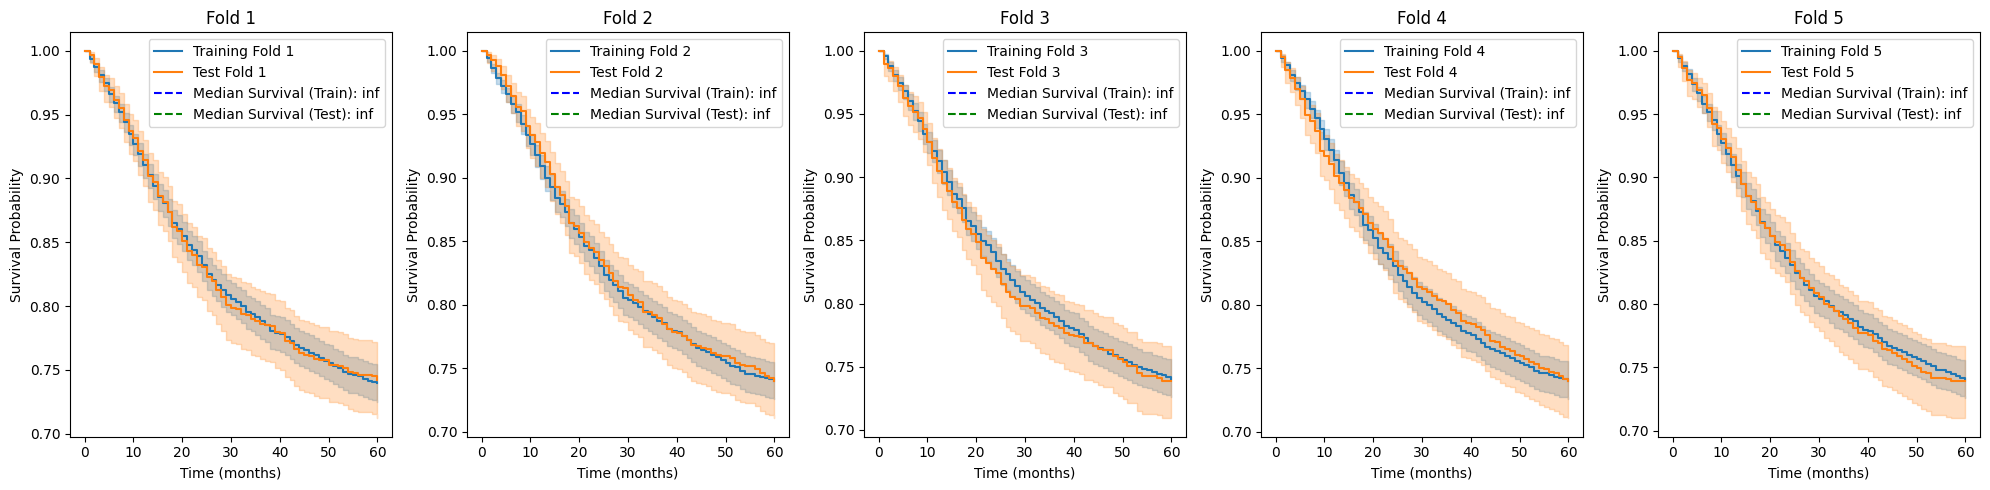

In [44]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import pickle
import os

# Creating a figure with five subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# Iterate over each fold's pickle file in the save path
for fold_number in range(1, 6):
    train_file_path = os.path.join(save_path, f'train_fold_{fold_number}.pkl')
    test_file_path = os.path.join(save_path, f'test_fold_{fold_number}.pkl')

    # Load the training and test sets using pickle
    with open(train_file_path, 'rb') as f:
        train_data = pickle.load(f)

    with open(test_file_path, 'rb') as f:
        test_data = pickle.load(f)
    
    # Create KaplanMeierFitter objects
    kmf_train = KaplanMeierFitter()
    kmf_test = KaplanMeierFitter()
    
    # Fit the training set data
    kmf_train.fit(train_data['time'], event_observed=train_data['event'], label=f'Training Fold {fold_number}')
    
    # Fit the test set data
    kmf_test.fit(test_data['time'], event_observed=test_data['event'], label=f'Test Fold {fold_number}')
    
    # Plot the survival function on the respective subplot
    ax = axs[fold_number - 1]
    kmf_train.plot_survival_function(ax=ax)
    kmf_test.plot_survival_function(ax=ax)

    # Compute and annotate median survival times on the plot
    median_survival_train = kmf_train.median_survival_time_
    median_survival_test = kmf_test.median_survival_time_
    
    # Add vertical dashed lines for median survival times
    if pd.notnull(median_survival_train):
        ax.axvline(x=median_survival_train, color='blue', linestyle='--', 
                   label=f'Median Survival (Train): {median_survival_train}')
    
    if pd.notnull(median_survival_test):
        ax.axvline(x=median_survival_test, color='green', linestyle='--', 
                   label=f'Median Survival (Test): {median_survival_test}')
    
    # Add legend to the respective subplot
    ax.legend()

    # Set title and labels for the respective subplot
    ax.set_title(f'Fold {fold_number}')
    ax.set_xlabel('Time (months)')
    ax.set_ylabel('Survival Probability')

# Adjust the layout of the subplots
plt.tight_layout()

# Display the figure
plt.show()

## 数据平衡前的01分布

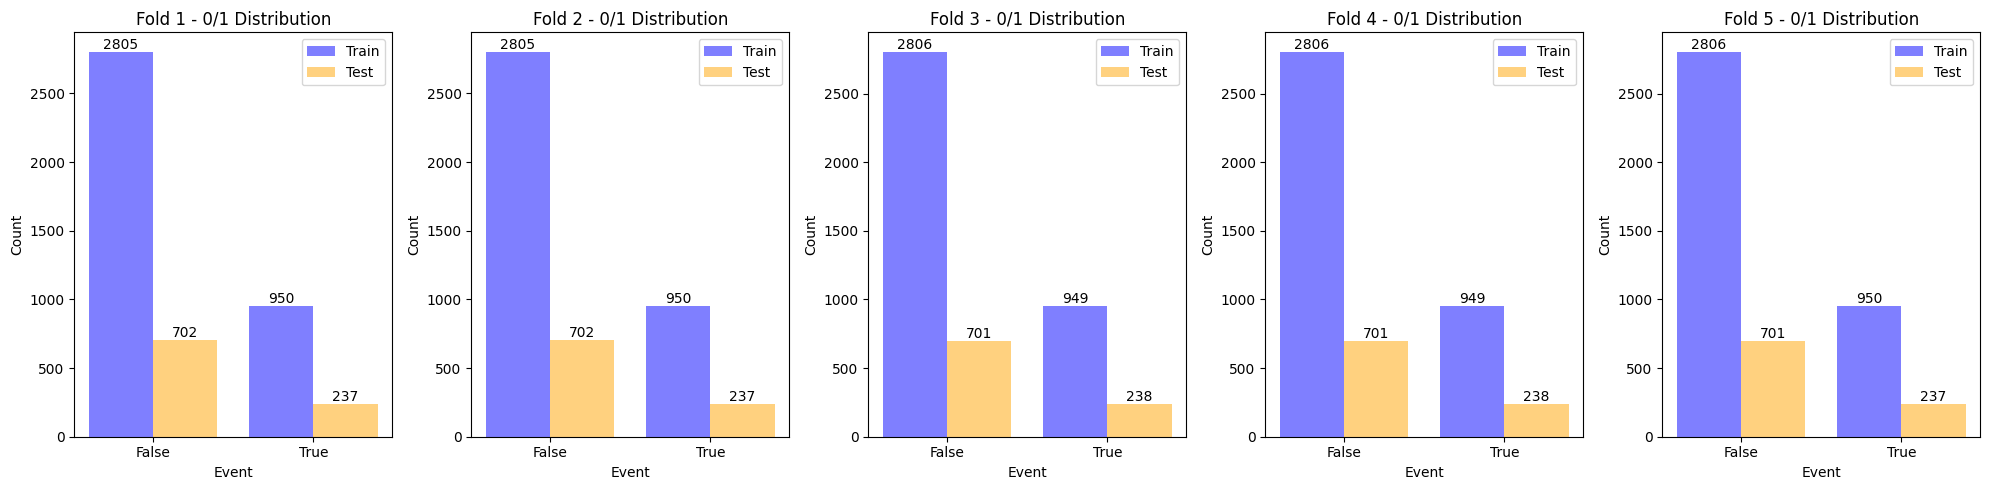

In [45]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt



# 创建包含五个子图的图表
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# 遍历保存路径下的每个折的pickle文件
for fold_number in range(1, 6):
    train_file_path = os.path.join(save_path, f'train_fold_{fold_number}.pkl')
    test_file_path = os.path.join(save_path, f'test_fold_{fold_number}.pkl')

    # 使用pickle读取训练集和测试集
    with open(train_file_path, 'rb') as f:
        train_data = pickle.load(f)

    with open(test_file_path, 'rb') as f:
        test_data = pickle.load(f)

    # 统计每折训练集和测试集中的0/1分布
    train_counts = train_data['event'].value_counts()
    test_counts = test_data['event'].value_counts()

    # 定义横坐标位置
    x = np.arange(len(train_counts))

    # 在对应的子图中绘制分组条形图
    ax = axs[fold_number - 1]
    ax.bar(x - 0.2, train_counts.values, width=0.4, label='Train', color='blue', alpha=0.5)
    ax.bar(x + 0.2, test_counts.values, width=0.4, label='Test', color='orange', alpha=0.5)

    # 在每个条形的上方添加标签
    for i, v in enumerate(train_counts.values):
        ax.text(x[i] - 0.2, v, str(v), ha='center', va='bottom')

    for i, v in enumerate(test_counts.values):
        ax.text(x[i] + 0.2, v, str(v), ha='center', va='bottom')

    # 设置横坐标刻度和标签
    ax.set_xticks(x)
    ax.set_xticklabels(train_counts.index)

    # 设置子图标题和标签
    ax.set_title(f'Fold {fold_number} - 0/1 Distribution')
    ax.set_xlabel('Event')
    ax.set_ylabel('Count')

    # 显示图例
    ax.legend()

# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()

## 对训练集数据进行样本平衡

- save_path0 = "./withoutmissing_pkl/未smote的五折pkl文件"
- save_path = "./withoutmissing_pkl/smote五折pkl文件"

In [46]:
import os
import pandas as pd
import pickle
from imblearn.over_sampling import SMOTE


# 初始化SMOTE对象
smote = SMOTE()

# 遍历每一折
for fold_number in range(1, 6):
    # 构造训练集和测试集的文件路径
    train_file_path = os.path.join(save_path, f'train_fold_{fold_number}.pkl')

    # 加载训练集数据
    with open(train_file_path, 'rb') as f:
        train_data = pickle.load(f)

    # 提取特征和目标变量
    X_train = train_data.drop('event', axis=1)
    y_train = train_data['event']
    
    # 使用SMOTE方法进行样本平衡
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
    
    # 将平衡后的特征和目标变量合并回DataFrame
    train_data_balanced = pd.concat([X_train_balanced, y_train_balanced], axis=1)
    
    # 使用pickle将平衡后的数据重新保存到原始训练集文件
    with open(train_file_path, 'wb') as f:
        pickle.dump(train_data_balanced, f)

## 数据平衡后的生存曲线

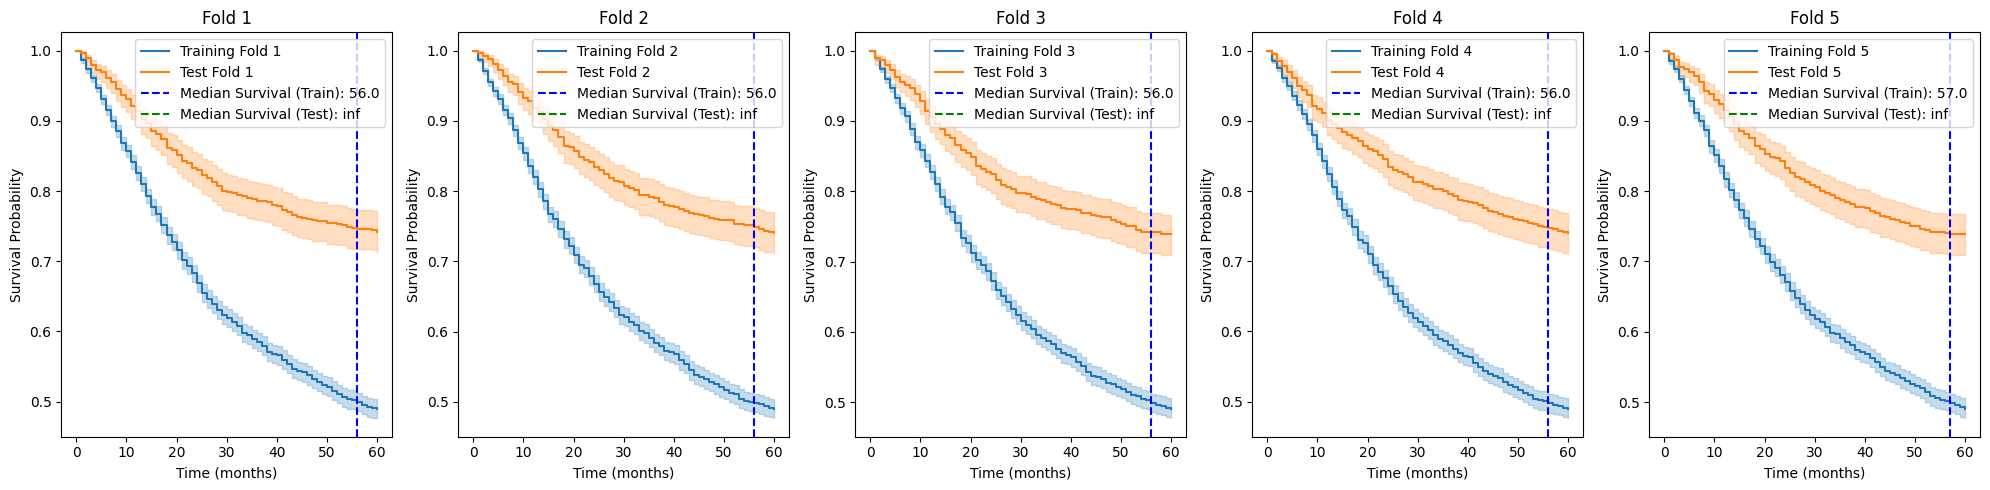

In [47]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import pickle
import os

# Assume save_path is defined
# save_path = "path_to_your_directory"

# Creating a figure with five subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# Iterate over each fold's pickle file in the save path
for fold_number in range(1, 6):
    train_file_path = os.path.join(save_path, f'train_fold_{fold_number}.pkl')
    test_file_path = os.path.join(save_path, f'test_fold_{fold_number}.pkl')

    # Load the training and test sets using pickle
    with open(train_file_path, 'rb') as f:
        train_data = pickle.load(f)

    with open(test_file_path, 'rb') as f:
        test_data = pickle.load(f)
    
    # Create KaplanMeierFitter objects
    kmf_train = KaplanMeierFitter()
    kmf_test = KaplanMeierFitter()
    
    # Fit the training set data
    kmf_train.fit(train_data['time'], event_observed=train_data['event'], label=f'Training Fold {fold_number}')
    
    # Fit the test set data
    kmf_test.fit(test_data['time'], event_observed=test_data['event'], label=f'Test Fold {fold_number}')
    
    # Plot the survival function on the respective subplot
    ax = axs[fold_number - 1]
    kmf_train.plot_survival_function(ax=ax)
    kmf_test.plot_survival_function(ax=ax)

    # Compute and annotate median survival times on the plot
    median_survival_train = kmf_train.median_survival_time_
    median_survival_test = kmf_test.median_survival_time_
    
    # Add vertical dashed lines for median survival times
    if pd.notnull(median_survival_train):
        ax.axvline(x=median_survival_train, color='blue', linestyle='--', 
                   label=f'Median Survival (Train): {median_survival_train}')
    
    if pd.notnull(median_survival_test):
        ax.axvline(x=median_survival_test, color='green', linestyle='--', 
                   label=f'Median Survival (Test): {median_survival_test}')
    
    # Add legend to the respective subplot
    ax.legend()

    # Set title and labels for the respective subplot
    ax.set_title(f'Fold {fold_number}')
    ax.set_xlabel('Time (months)')
    ax.set_ylabel('Survival Probability')

# Adjust the layout of the subplots
plt.tight_layout()

# Display the figure
plt.show()

## 数据平衡后的01分布

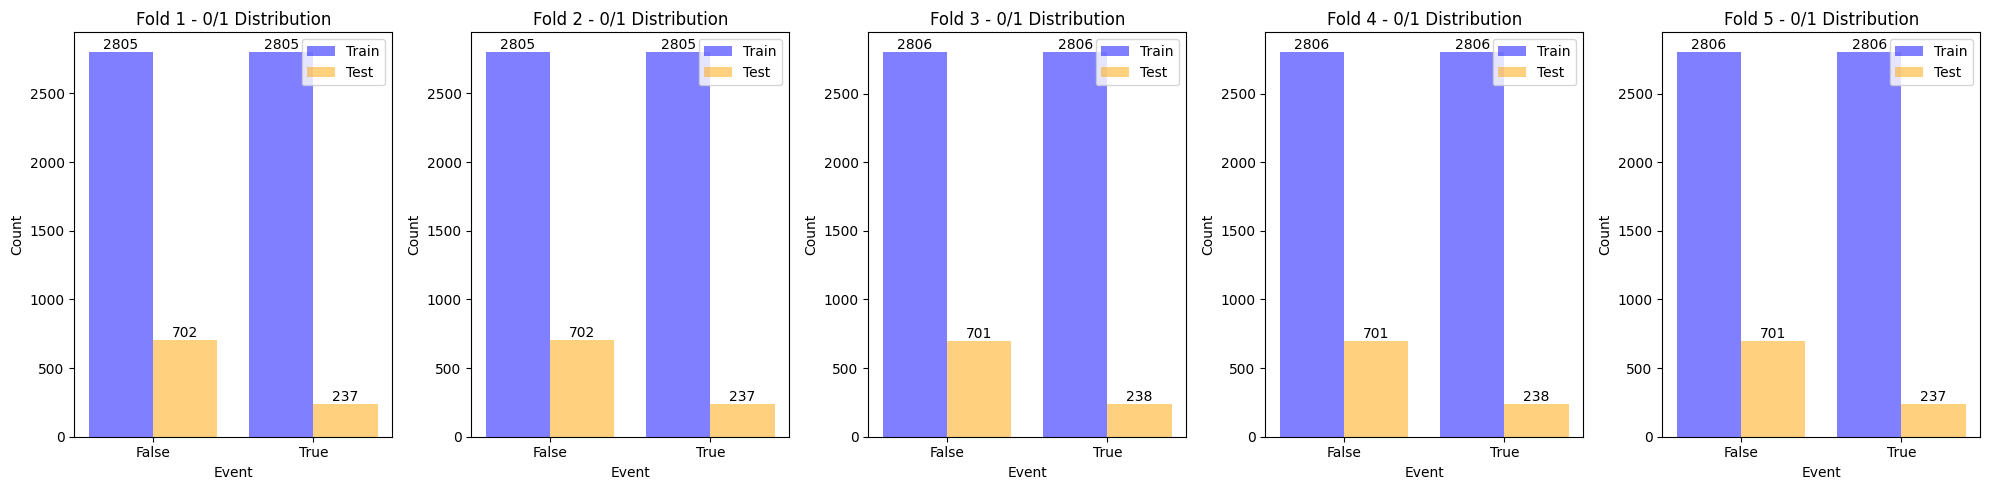

In [48]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

# 指定保存文件的路径
# save_path = "D:\\OneDrive\\MSHSM\\0BMS5006\\SEER\\五折pkl文件"

# 创建包含五个子图的图表
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# 遍历保存路径下的每个折的pickle文件
for fold_number in range(1, 6):
    train_file_path = os.path.join(save_path, f'train_fold_{fold_number}.pkl')
    test_file_path = os.path.join(save_path, f'test_fold_{fold_number}.pkl')

    # 使用pickle读取训练集和测试集
    with open(train_file_path, 'rb') as f:
        train_data = pickle.load(f)

    with open(test_file_path, 'rb') as f:
        test_data = pickle.load(f)

    # 统计每折训练集和测试集中的0/1分布
    train_counts = train_data['event'].value_counts()
    test_counts = test_data['event'].value_counts()

    # 定义横坐标位置
    x = np.arange(len(train_counts))

    # 在对应的子图中绘制分组条形图
    ax = axs[fold_number - 1]
    ax.bar(x - 0.2, train_counts.values, width=0.4, label='Train', color='blue', alpha=0.5)
    ax.bar(x + 0.2, test_counts.values, width=0.4, label='Test', color='orange', alpha=0.5)

    # 在每个条形的上方添加标签
    for i, v in enumerate(train_counts.values):
        ax.text(x[i] - 0.2, v, str(v), ha='center', va='bottom')

    for i, v in enumerate(test_counts.values):
        ax.text(x[i] + 0.2, v, str(v), ha='center', va='bottom')

    # 设置横坐标刻度和标签
    ax.set_xticks(x)
    ax.set_xticklabels(train_counts.index)

    # 设置子图标题和标签
    ax.set_title(f'Fold {fold_number} - 0/1 Distribution')
    ax.set_xlabel('Event')
    ax.set_ylabel('Count')

    # 显示图例
    ax.legend()

# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()

## 检查训练集和测试集最小最大随访时间是否相同

In [49]:
from sklearn.model_selection import KFold
import numpy as np

# 用于存储每一折的最小和最大随访时间
min_times = []
max_times = []

# 遍历保存路径下的每个折的pickle文件
for fold_number in range(1, 6):
    train_file_path = os.path.join(save_path, f'train_fold_{fold_number}.pkl')


    with open(train_file_path, 'rb') as f:
        train_data = pickle.load(f)
        
    # 提取特征和目标变量
#     X_train = train_data[best_features]
    y_train_event = train_data['event'].astype(bool)
    y_train_time = train_data['time']

#     X_test = test_data[best_features]
    y_test_event = test_data['event'].astype(bool)
    y_test_time = test_data['time']

    # 将目标变量转换为结构化数组
    y_train = np.array(list(zip(y_train_event, y_train_time)),
                       dtype=[('event', bool), ('time', float)])

    y_test = np.array(list(zip(y_test_event, y_test_time)),
                      dtype=[('event', bool), ('time', float)])

        

    # 计算当前折测试数据中的最小和最大随访时间并保存
    min_follow_up_time = np.min(y_train['time']) + 1e-6  # epsilon > 0
    max_follow_up_time = np.max(y_train['time']) - 1e-6  # epsilon > 0

    min_times.append(min_follow_up_time)
    max_times.append(max_follow_up_time)

# 检查最小和最大随访时间是否相同
same_min_time = all(min_time == min_times[0] for min_time in min_times)
same_max_time = all(max_time == max_times[0] for max_time in max_times)

print(f"所有折的最小随访时间相同: {same_min_time}")
print(f"所有折的最大随访时间相同: {same_max_time}")

所有折的最小随访时间相同: True
所有折的最大随访时间相同: True


In [50]:
from sklearn.model_selection import KFold
import numpy as np

# 用于存储每一折的最小和最大随访时间
min_times = []
max_times = []

# 遍历保存路径下的每个折的pickle文件
for fold_number in range(1, 6):
    test_file_path = os.path.join(save_path, f'test_fold_{fold_number}.pkl')


    with open(test_file_path, 'rb') as f:
        test_data = pickle.load(f)
        
    y_test_time = test_data['time']

    # 将目标变量转换为结构化数组
    y_test = np.array(list(zip(y_test_event, y_test_time)),
                      dtype=[('event', bool), ('time', float)])
        

    # 计算当前折测试数据中的最小和最大随访时间并保存
    min_follow_up_time = np.min(y_test['time']) + 1e-6  # epsilon > 0
    max_follow_up_time = np.max(y_test['time']) - 1e-6  # epsilon > 0

    min_times.append(min_follow_up_time)
    max_times.append(max_follow_up_time)

# 检查最小和最大随访时间是否相同
same_min_time = all(min_time == min_times[0] for min_time in min_times)
same_max_time = all(max_time == max_times[0] for max_time in max_times)

print(f"所有折的最小随访时间相同: {same_min_time}")
print(f"所有折的最大随访时间相同: {same_max_time}")

所有折的最小随访时间相同: True
所有折的最大随访时间相同: True


# PH假设检验

In [51]:
##PH检验没有通过

import os
import pickle
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test

# Iterate over each fold
for fold_number in range(1, 2):
    # Load the training set
    train_file_path = os.path.join(save_path, f'train_fold_{fold_number}.pkl')
    with open(train_file_path, 'rb') as f:
        train_data = pickle.load(f)
    
    # Create an instance of the CoxPHFitter
    cph = CoxPHFitter()
    
    # Fit the Cox model to the training data
    cph.fit(train_data, duration_col='time', event_col='event')
    
    cph.check_assumptions(train_data, p_value_threshold=0.05, show_plots=False)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 5610 total observations, 2805 right-censored observations>
         test_name = proportional_hazard_test

---
                                                test_statistic      p  -log2(p)
Age                                       km              2.73   0.10      3.35
                                          rank            3.02   0.08      3.61
Chemotherapy_Received                     km             35.81 <0.005     28.78
                                          rank           35.57 <0.005     28.60
Differentiation                           km              3.26   0.07      3.82
                                          rank            3.77   0.05      4.26
Histology_Adenocarcinoma                  km              1.74   0.19      2.42
                                          rank            2.15   0.14      2.81
Histology_Adenosquamous_Carcinoma         km              0.32   0.57      0.80
                                          rank            0.49   0.49      1.04
Histology_Neuroendocrine_Carcinoma        km              1.15   0.28      1.81
                                          rank            1.27   0.26      1.95
Histology_Squamous_Cell_Carcinoma         km              0.81   0.37      1.44
                                          rank            1.06   0.30      1.72
InSitu_Malignant_Cancer_Count             km              2.01   0.16      2.68
                                          rank            1.70   0.19      2.38
Lymph_Node_Surgery_Extent_None_Removed    km              9.40 <0.005      8.85
                                          rank            9.66 <0.005      9.05
Lymph_Node_Surgery_Extent_Removed         km              2.57   0.11      3.20
                                          rank            2.72   0.10      3.34
Lymph_Node_Surgery_Extent_Sentinel_Biopsy km              1.79   0.18      2.47
                                          rank            1.89   0.17      2.56
Marital_Status_Divorced                   km             16.21 <0.005     14.11
                                          rank           18.17 <0.005     15.59
Marital_Status_Married                    km             45.09 <0.005     35.63
                                          rank           48.25 <0.005     37.96
Marital_Status_Separated                  km             21.36 <0.005     18.00
                                          rank           22.88 <0.005     19.15
Marital_Status_Single                     km             78.95 <0.005     60.45
                                          rank           82.59 <0.005     63.10
Marital_Status_Widowed                    km             59.02 <0.005     45.87
                                          rank           60.87 <0.005     47.22
Primary_Site_Cervix_Uteri                 km             18.90 <0.005     16.15
                                          rank           19.55 <0.005     16.64
Primary_Site_Endocervix                   km              0.93   0.33      1.58
                                          rank            1.12   0.29      1.79
Primary_Site_Exocervix                    km              0.44   0.51      0.98
                                          rank            0.60   0.44      1.19
Primary_Site_Surgery_Destruction          km              0.02   0.88      0.19
                                          rank            0.05   0.82      0.29
Primary_Site_Surgery_None                 km              5.48   0.02      5.70
                                          rank            5.56   0.02      5.77
Primary_Site_Surgery_Resection            km              0.13   0.72      0.48
                                          rank            0.18   0.67      0.57
Race_Black                                km             16.06 <0.005     13.99
                                         



1. Variable 'Tumor_Stage' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 3), you can include `strata=['Tumor_Stage', ...]` in the
call in `.fit`. See documentation in link [E] below.

2. Variable 'Differentiation' failed the non-proportional test: p-value is 0.0521.

   Advice: with so few unique values (only 4), you can include `strata=['Differentiation', ...]` in
the call in `.fit`. See documentation in link [E] below.

3. Variable 'Tumor_Size' failed the non-proportional test: p-value is 0.0002.

   Advice: with so few unique values (only 3), you can include `strata=['Tumor_Size', ...]` in the
call in `.fit`. See documentation in link [E] below.

4. Variable 'Chemotherapy_Received' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 2), you can include `strata=['Chemotherapy_Received',
...]` in the call in `.fit`. See documentation in link [E] below.

5. Variable 'Marital_Status_Divorced

# 特征筛选

## 特征筛选函数封装

### 基于RSF的特征重要性

In [52]:
#基于RSF特征重要性

import pandas as pd
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from sklearn.inspection import permutation_importance

def rsf_feature_importances(rsf, X, y):
    rsf.fit(X, y)
    r = permutation_importance(rsf, X, y, n_repeats=30, random_state=24)
    return r.importances_mean

def select_features_survival_analysis(data, n_features_to_select=5):
    # Separate features and target variables
    X = data.drop(columns=['time', 'event'])
    y_df = data[['time', 'event']]
    
    # Convert target variable DataFrame to structured array
    y = Surv.from_dataframe('event', 'time', y_df)
    
    # Initialize Random Survival Forest model
    rsf = RandomSurvivalForest(n_estimators=100, min_samples_split=10, random_state=24)

    # 获取特征重要性并排序
    feature_importances = rsf_feature_importances(rsf, X, y)
    important_indices = np.where(feature_importances > 0)[0]  # 筛选出重要性大于0的特征索引
    sorted_indices = important_indices[feature_importances[important_indices].argsort()[::-1]]  # 从高到低排序特征索引

    # 基于重要性大于0的特征数量，选择特征
    if len(sorted_indices) >= 10:
        selected_features = X.columns[sorted_indices][:10].tolist()  # 选择前10个特征
    elif len(sorted_indices) >= 5:
        selected_features = X.columns[sorted_indices][:5].tolist()   # 选择前5个特征
    else:
        selected_features = X.columns[sorted_indices].tolist()       # 选择所有重要性大于0的特征

    return selected_features  # 以列表形式返回选择的特征

### 梯度提升筛选

In [53]:
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.util import Surv
import pandas as pd

def gradient_boosting_feature_selection(data):
    # 检查数据是否包含`time`和`event`列
    if 'time' not in data.columns or 'event' not in data.columns:
        raise ValueError("Input DataFrame must contain 'time' and 'event' columns.")
    
    # 分离特征和目标变量
    X = data.drop(columns=['time', 'event'])
    y_df = data[['time', 'event']]
    
    # 将目标变量DataFrame转换为结构化数组
    y = Surv.from_dataframe('event', 'time', y_df)
    
    # 初始化梯度提升生存分析模型
    gb_model = GradientBoostingSurvivalAnalysis(loss='squared',random_state=24)

    # 训练模型
    gb_model.fit(X, y)

    # 获取特征重要性并排序
    feature_importances = gb_model.feature_importances_
    important_indices = np.where(feature_importances > 0)[0]  # 筛选出重要性大于0的特征索引
    sorted_indices = important_indices[feature_importances[important_indices].argsort()[::-1]]  # 从高到低排序特征索引

    # 基于重要性大于0的特征数量，选择特征
    if len(sorted_indices) >= 10:
        selected_features = X.columns[sorted_indices][:10].tolist()  # 选择前10个特征
    elif len(sorted_indices) >= 5:
        selected_features = X.columns[sorted_indices][:5].tolist()   # 选择前5个特征
    else:
        selected_features = X.columns[sorted_indices].tolist()       # 选择所有重要性大于0的特征

    return selected_features  # 以列表形式返回选择的特征

### 逐步前向选择CI

In [54]:
#使用随机生存树作为基础模型

from sksurv.metrics import concordance_index_censored
from sksurv.ensemble import RandomSurvivalForest

def calculate_ci_for_feature_set(X, y, rsf, features):
    temp_X = X[features].to_numpy()
    rsf.fit(temp_X, y)
    ci = concordance_index_censored(y['event'], y['time'], rsf.predict(temp_X))[0]
    return ci

def stepwise_ci_selection_rsf(data):
    y = data[['event', 'time']].to_records(index=False)
    X = data.drop(columns=['time', 'event'])
    
    rsf = RandomSurvivalForest(n_estimators=100, min_samples_split=10, random_state=24)
    
    selected_features = list(X.columns)
    best_ci = 0
    forward_selected_features = []
    ci_changes = []

    while selected_features:
        ci_with_features = []

        for feature in selected_features:
            temp_features = forward_selected_features + [feature]
            ci = calculate_ci_for_feature_set(X, y, rsf, temp_features)
            ci_with_features.append((ci, feature))

        ci_with_features.sort(key=lambda x: x[0], reverse=True)
        best_ci_current, best_feature = ci_with_features[0]

        if best_ci_current > best_ci:
            best_ci = best_ci_current
            forward_selected_features.append(best_feature)
            selected_features.remove(best_feature)
            ci_changes.append((best_ci, best_feature))
        else:
            break

#     return selected_features
    return forward_selected_features

In [55]:
# #单个函数调试专用

# import os
# import pickle

# fold_number = 1

# train_file_path = os.path.join(save_path, f'train_fold_{fold_number}.pkl')

# # 使用pickle读取第一折的训练集
# with open(train_file_path, 'rb') as f:
#     train_data = pickle.load(f)
    
# select_features_survival_analysis(train_data)

In [56]:
# #单个函数调试专用

# import os
# import pickle

# fold_number = 1

# train_file_path = os.path.join(save_path, f'train_fold_{fold_number}.pkl')

# # 使用pickle读取第一折的训练集
# with open(train_file_path, 'rb') as f:
#     train_data = pickle.load(f)
    
# gradient_boosting_feature_selection(train_data)

In [57]:
# #单个函数调试专用

# import os
# import pickle

# fold_number = 1

# train_file_path = os.path.join(save_path, f'train_fold_{fold_number}.pkl')

# # 使用pickle读取第一折的训练集
# with open(train_file_path, 'rb') as f:
#     train_data = pickle.load(f)
    
# stepwise_ci_selection_rsf(train_data)

## 五折特征筛选

In [59]:
save_path

'./withoutmissing_pkl/smote五折pkl文件'

In [60]:
import os
import time
import pickle
from concurrent.futures import ProcessPoolExecutor, as_completed
from tqdm import tqdm

def process_fold(fold_number):
    """处理单个折，执行三种特征选择方法并取交集"""
    train_file_path = os.path.join(save_path, f'train_fold_{fold_number}.pkl')
    fold_start_time = time.time()

    # 加载训练数据
    with open(train_file_path, 'rb') as f:
        train_data = pickle.load(f)

    # 执行三种特征选择方法
    features_survival = select_features_survival_analysis(train_data)
    features_gb = gradient_boosting_feature_selection(train_data)
    features_rsf_stepwise = stepwise_ci_selection_rsf(train_data)

    # 求交集
    selected_features = set(features_survival).intersection(features_gb).intersection(features_rsf_stepwise)

    fold_time = time.time() - fold_start_time
    return fold_number, selected_features, fold_time


if __name__ == '__main__':
    features_per_fold = []
    fold_times = []
    total_start_time = time.time()

    print("开始多进程特征选择...")

    # 启动多进程执行，每折任务一个进程，总共 5 折，最多 15 核
    with ProcessPoolExecutor(max_workers=15) as executor:
        futures = {executor.submit(process_fold, i): i for i in range(1, 6)}

        # 使用 tqdm 显示进度条
        for future in tqdm(as_completed(futures), total=5, desc="处理进度"):
            fold_number, selected_features, fold_time = future.result()
            features_per_fold.append(selected_features)
            fold_times.append(fold_time)

            print(f"\n第 {fold_number} 折选出的特征: {selected_features}")
            print(f"第 {fold_number} 折特征选择完成，耗时 {fold_time:.2f} 秒。")

    # 所有折选出的特征取交集
    final_selected_features = set.intersection(*features_per_fold)
    final_selected_features = sorted(list(final_selected_features))

    total_time = time.time() - total_start_time
    print(f"\n所有折的特征选择总耗时: {total_time:.2f} 秒。")
    print("基于交集的最终选出的特征:", final_selected_features)

开始多进程特征选择...


处理进度:  20%|██        | 1/5 [21:45<1:27:02, 1305.63s/it]


第 5 折选出的特征: {'Marital_Status_Married', 'Histology_Squamous_Cell_Carcinoma', 'Radiotherapy_Received', 'Tumor_Stage', 'Tumor_Size', 'Chemotherapy_Received', 'Primary_Site_Surgery_Resection'}
第 5 折特征选择完成，耗时 1305.63 秒。


处理进度:  40%|████      | 2/5 [22:57<29:00, 580.03s/it]   


第 2 折选出的特征: {'Histology_Squamous_Cell_Carcinoma', 'Radiotherapy_Received', 'Tumor_Stage', 'Tumor_Size', 'Chemotherapy_Received', 'Primary_Site_Surgery_Resection', 'Age'}
第 2 折特征选择完成，耗时 1377.74 秒。


处理进度:  60%|██████    | 3/5 [23:18<10:49, 324.71s/it]


第 1 折选出的特征: {'Marital_Status_Married', 'Histology_Squamous_Cell_Carcinoma', 'Radiotherapy_Received', 'Tumor_Stage', 'Tumor_Size', 'Chemotherapy_Received', 'Primary_Site_Surgery_Resection', 'Age'}
第 1 折特征选择完成，耗时 1398.62 秒。


处理进度:  80%|████████  | 4/5 [23:43<03:26, 206.47s/it]


第 4 折选出的特征: {'Marital_Status_Married', 'Lymph_Node_Surgery_Extent_Removed', 'Histology_Squamous_Cell_Carcinoma', 'Radiotherapy_Received', 'Tumor_Stage', 'Tumor_Size', 'Chemotherapy_Received', 'Primary_Site_Surgery_Resection'}
第 4 折特征选择完成，耗时 1423.83 秒。


处理进度: 100%|██████████| 5/5 [23:46<00:00, 285.37s/it]


第 3 折选出的特征: {'Lymph_Node_Surgery_Extent_Removed', 'Histology_Squamous_Cell_Carcinoma', 'Radiotherapy_Received', 'Tumor_Stage', 'Chemotherapy_Received', 'Tumor_Size', 'Primary_Site_Surgery_Resection', 'Age'}
第 3 折特征选择完成，耗时 1426.84 秒。

所有折的特征选择总耗时: 1427.11 秒。
基于交集的最终选出的特征: ['Chemotherapy_Received', 'Histology_Squamous_Cell_Carcinoma', 'Primary_Site_Surgery_Resection', 'Radiotherapy_Received', 'Tumor_Size', 'Tumor_Stage']


# 模型训练

In [61]:
# final_selected_features=['Histology_Squamous_Cell_Carcinoma',
#  'Radiotherapy_Received',
#  'Tumor_Stage',
#  'Chemotherapy_Received',
#  'Primary_Site_Surgery_Resection',
#  'Age']

In [62]:
# 更新数据
FS1=final_selected_features
FS1

['Chemotherapy_Received',
 'Histology_Squamous_Cell_Carcinoma',
 'Primary_Site_Surgery_Resection',
 'Radiotherapy_Received',
 'Tumor_Size',
 'Tumor_Stage']

## 交集训练

In [63]:
import os
import numpy as np
import pandas as pd
import pickle
from lifelines import CoxTimeVaryingFitter, CoxPHFitter
from lifelines.utils import to_episodic_format
from sksurv.tree import SurvivalTree
from sksurv.ensemble import RandomSurvivalForest
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_ipcw, integrated_brier_score
from tqdm import tqdm
import time

start = time.time()


# 自定义函数检查并处理缺失值
def check_and_clean_data(data, required_columns):
    for col in required_columns:
        if col not in data.columns:
            raise ValueError(f"Missing required column: {col}")
    missing_count = data[required_columns].isnull().sum().sum()
    if missing_count > 0:
        print(f"Warning: Detected {missing_count} missing values. Dropping affected rows.")
        data = data.dropna(subset=required_columns)
    return data

#自定义函数求CoxTV模型的生存概率
def calculate_survival_probabilities_coxtv(risk_scores, base_hazard, times):
    """
    根据 CoxTimeVaryingFitter 的风险分数和基准风险计算生存概率。
    将生存概率矩阵限制为指定的时间点。
    """
    # 对基准累积风险进行插值，确保与 times 对齐
    base_hazard_interp = np.interp(times, np.arange(len(base_hazard)), base_hazard)
    
    survival_probs = []
    for score in risk_scores:
        # 使用插值后的基准累积风险计算生存概率
        S_t = np.exp(-base_hazard_interp * np.exp(score))
        survival_probs.append(S_t)
    return np.array(survival_probs)



# 初始化模型
CoxTV = CoxTimeVaryingFitter()
CoxPH = CoxPHFitter()
ST = SurvivalTree(random_state=24)
RSF = RandomSurvivalForest(random_state=24)
GBSA = GradientBoostingSurvivalAnalysis(random_state=24)



# 初始化列表用于保存每一折的 CI 和 IBS 评分
c_scores1=[]
brier_scores1=[]


# 模型保存路径
models_save_path = "./5_fold models_without_missing"


# 遍历每一折
for fold_number in tqdm(range(1, 6), desc="Processing folds"):
    # 加载训练集和测试集
    train_file_path = os.path.join(save_path, f'train_fold_{fold_number}.pkl')
    test_file_path = os.path.join(save_path, f'test_fold_{fold_number}.pkl')
    with open(train_file_path, 'rb') as f:
        train_data = pickle.load(f)

    with open(test_file_path, 'rb') as f:
        test_data = pickle.load(f)     

    # 提取特征和目标变量
    X_train = train_data[FS1]
    y_train_event = train_data['event'].astype(bool)
    y_train_time = train_data['time']

    X_test = test_data[FS1]
    y_test_event = test_data['event'].astype(bool)
    y_test_time = test_data['time']

    y_train = np.array(list(zip(y_train_event, y_train_time)),
                       dtype=[('event', bool), ('time', float)])
    y_test = np.array(list(zip(y_test_event, y_test_time)),
                      dtype=[('event', bool), ('time', float)])

    # 合并数据（供 CoxPHFitter 使用）
    train_combined = pd.concat([train_data[['time', 'event']], X_train], axis=1)
    test_combined = pd.concat([test_data[['time', 'event']], X_test], axis=1)  


    # 转换为 episodic format（供 CoxTV 使用）
    # 检查并清理数据
    required_columns = ['time', 'event']
    train_data = check_and_clean_data(train_data, required_columns)
    test_data = check_and_clean_data(test_data, required_columns)

    # 检查并添加唯一的 ID 列
    if 'id' not in train_data.columns:
        train_data['id'] = np.arange(len(train_data))
    if 'id' not in test_data.columns:
        test_data['id'] = np.arange(len(test_data))    
    
    episodic_train = to_episodic_format(
        pd.concat([train_data[['time', 'event', 'id']], X_train], axis=1),
        duration_col="time", event_col="event", id_col="id"
    )
    episodic_test = to_episodic_format(
        pd.concat([test_data[['time', 'event', 'id']], X_test], axis=1),
        duration_col="time", event_col="event", id_col="id"
    )

 

    # 训练模型
    CoxPH.fit(train_combined, duration_col='time', event_col='event')   
    CoxTV.fit(episodic_train, id_col='id', start_col='start', stop_col='stop', event_col='event')
    ST.fit(X_train, y_train)
    RSF.fit(X_train, y_train)
    GBSA.fit(X_train, y_train)
    
 

    # 保存模型
    dataset_name = 'FS1'
    models = [
        ('CoxPH', CoxPH),
        ('CoxTV',CoxTV),
        ('ST', ST),
        ('RSF', RSF),
        ('GBSA', GBSA)
    ]

    for model_name, model in models:
        model_filename = f"{dataset_name}_{model_name}_fold{fold_number}.pkl"
        model_filepath = os.path.join(models_save_path, model_filename)
        with open(model_filepath, 'wb') as f:
            pickle.dump(model, f)
 


    #预测CoxPH模型的风险分数
    risk_scores_cph = CoxPH.predict_partial_hazard(test_combined)
    
    #预测CoxTV模型的风险分数
    risk_scores_coxtv_raw = CoxTV.predict_partial_hazard(episodic_test)
    episodic_test['partial_hazard'] = risk_scores_coxtv_raw
    aggregated_risk_scores_coxtv = episodic_test.groupby('id')['partial_hazard'].mean()
    risk_scores_coxtv = aggregated_risk_scores_coxtv.values
    
    # 预测其他模型的风险分数
    y_pred_ST = ST.predict(X_test)
    y_pred_RSF = RSF.predict(X_test)
    y_pred_GBSA = GBSA.predict(X_test)  

    # 计算 IPCW CI
    cindex_CoxPH = concordance_index_ipcw(y_train, y_test, risk_scores_cph, tau=59.9)[0]
    cindex_CoxTV = concordance_index_ipcw(y_train, y_test, risk_scores_coxtv, tau=59.9)[0]    
    cindex_ST = concordance_index_ipcw(y_train, y_test, y_pred_ST, tau=59.9)[0]
    cindex_RSF = concordance_index_ipcw(y_train, y_test, y_pred_RSF, tau=59.9)[0]
    cindex_GBSA = concordance_index_ipcw(y_train, y_test, y_pred_GBSA, tau=59.9)[0]

    
    # 记录 IPCW C-Index 评分
    c_scores1.append({'Model': 'CoxPH', 'Fold': fold_number, 'IPCW C-Index': cindex_CoxPH})   
    c_scores1.append({'Model': 'CoxTV', 'Fold': fold_number, 'IPCW C-Index': cindex_CoxTV})    
    c_scores1.append({'Model': 'ST', 'Fold': fold_number, 'IPCW C-Index': cindex_ST})
    c_scores1.append({'Model': 'RSF', 'Fold': fold_number, 'IPCW C-Index': cindex_RSF})
    c_scores1.append({'Model': 'GBSA', 'Fold': fold_number, 'IPCW C-Index': cindex_GBSA})

    
    
    # 计算 IBS
    ##确定times
    times = np.linspace(10 + 1e-6, 60 - 1e-6, 6)
    
    ##各模型的生存函数
    surv_funcs_CoxPH = CoxPH.predict_survival_function(test_combined, times=times) 
    #CoxTV无法直接计算生存函数，此处是通过自定义函数间接计算的
    surv_funcs_ST = ST.predict_survival_function(X_test)
    surv_funcs_RSF = RSF.predict_survival_function(X_test)
    surv_funcs_GBSA = GBSA.predict_survival_function(X_test)
    
    # 将生存函数转换为在特定时间点的概率估计 
    preds_CoxPH = surv_funcs_CoxPH.values.T
    preds_CoxTV = calculate_survival_probabilities_coxtv(risk_scores_coxtv, CoxTV.baseline_cumulative_hazard_.values.flatten(), times)    
    preds_ST= np.array([fn(times) for fn in surv_funcs_ST])
    preds_RSF= np.array([fn(times) for fn in surv_funcs_RSF])    
    preds_GBSA= np.array([fn(times) for fn in surv_funcs_GBSA])     
    
    #计算IBS分数
    ibs_CoxPH = integrated_brier_score(y_train, y_test, preds_CoxPH, times)
    ibs_CoxTV = integrated_brier_score(y_train, y_test, preds_CoxTV, times)    
    ibs_ST = integrated_brier_score(y_train, y_test, preds_ST, times)
    ibs_RSF = integrated_brier_score(y_train, y_test, preds_RSF, times)
    ibs_GBSA = integrated_brier_score(y_train, y_test, preds_GBSA, times)

    # 记录 IBS 分数
    brier_scores1.append({'Model': 'CoxPH', 'Fold': fold_number, 'IBS': ibs_CoxPH})
    brier_scores1.append({'Model': 'CoxTV', 'Fold': fold_number, 'IBS': ibs_CoxTV})    
    brier_scores1.append({'Model': 'ST', 'Fold': fold_number, 'IBS': ibs_ST})
    brier_scores1.append({'Model': 'RSF', 'Fold': fold_number, 'IBS': ibs_RSF})
    brier_scores1.append({'Model': 'GBSA', 'Fold': fold_number, 'IBS': ibs_GBSA})

    
    
# 计算平均 CI 评分
average_cindex1 = pd.DataFrame(c_scores1).groupby('Model')['IPCW C-Index'].mean().reset_index()

# 计算平均 Brier 分数
average_brier_scores1 = pd.DataFrame(brier_scores1).groupby('Model')['IBS'].mean().reset_index()

# 打印结果
print("Average C-Index:")
print(average_cindex1)
print("Average IBS:")
print(average_brier_scores1)

end = time.time()
print(f"Total time taken: {end - start} seconds")

Processing folds:   0%|          | 0/5 [00:00<?, ?it/s]

Processing folds: 100%|██████████| 5/5 [08:47<00:00, 105.59s/it]

Average C-Index:
   Model  IPCW C-Index
0  CoxPH      0.796690
1  CoxTV      0.796690
2   GBSA      0.810949
3    RSF      0.808116
4     ST      0.806440
Average IBS:
   Model       IBS
0  CoxPH  0.126716
1  CoxTV  0.292366
2   GBSA  0.124610
3    RSF  0.126951
4     ST  0.127834
Total time taken: 527.9740252494812 seconds


## 可视化结果

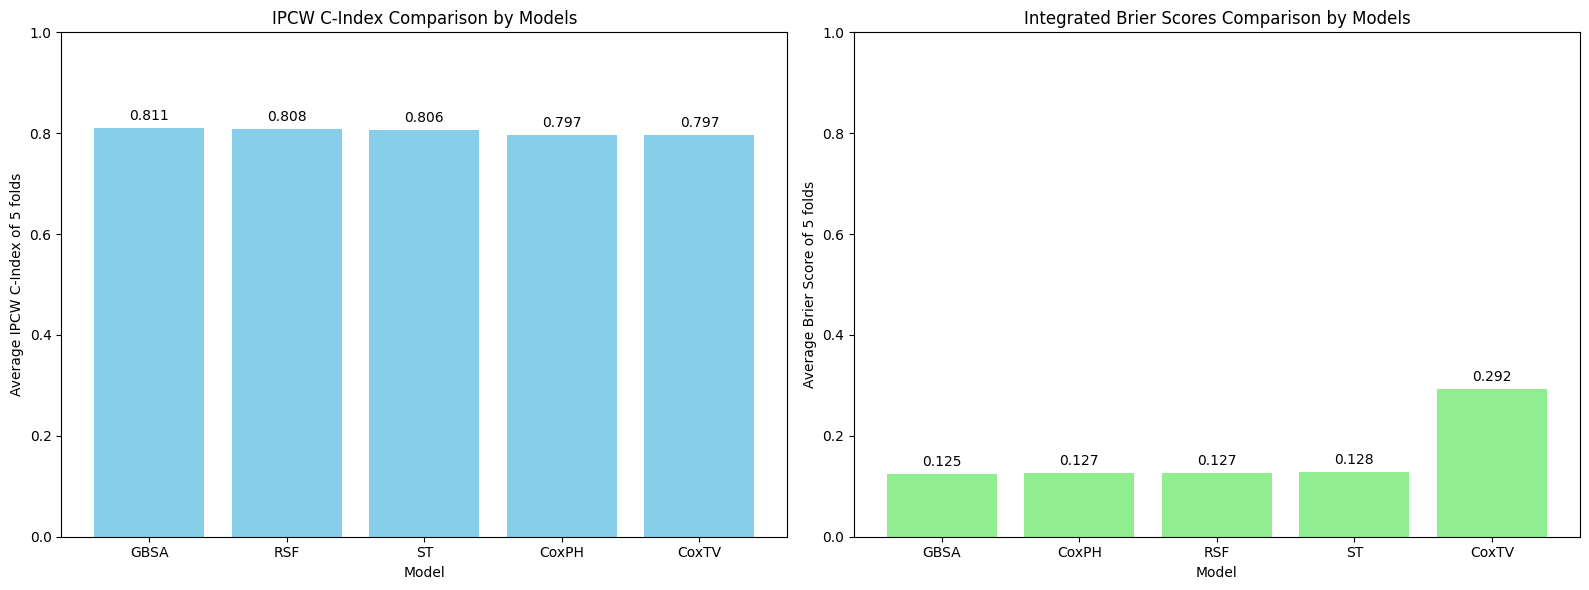

In [64]:
import matplotlib.pyplot as plt

# 对平均C-Index进行降序排序
average_cindex_sorted = average_cindex1.sort_values('IPCW C-Index', ascending=False)

# 对平均Brier分数进行升序排序
average_brier_scores_sorted = average_brier_scores1.sort_values('IBS', ascending=True)

# 创建一个新的figure，尺寸更加平衡
plt.figure(figsize=(16, 6))  # 调整为更加合适的尺寸

# 绘制平均C-Index柱状图
plt.subplot(1, 2, 1)  # 1行2列，当前是第1个图
cindex_bars = plt.bar(average_cindex_sorted['Model'], average_cindex_sorted['IPCW C-Index'], color='skyblue')
plt.title('IPCW C-Index Comparison by Models')
plt.xlabel('Model')
plt.ylabel('Average IPCW C-Index of 5 folds')
plt.ylim(0, 1)  # C-Index 的范围通常是 0 到 1
# 添加数据标签
for bar in cindex_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

# 绘制平均Brier分数柱状图
plt.subplot(1, 2, 2)  # 1行2列，当前是第2个图
brier_bars = plt.bar(average_brier_scores_sorted['Model'], average_brier_scores_sorted['IBS'], color='lightgreen')
plt.title('Integrated Brier Scores Comparison by Models')
plt.xlabel('Model')
plt.ylabel('Average Brier Score of 5 folds')
plt.ylim(0, 1)  # Brier分数的范围通常是 0 到 1
# 添加数据标签
for bar in brier_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

# 显示整个figure的内容
plt.tight_layout()
plt.show()

# 模型评价

In [65]:
#C-index和AUC属于区分度，IBS属于校准度

## Time-dependent Area under the ROC

###  FS1

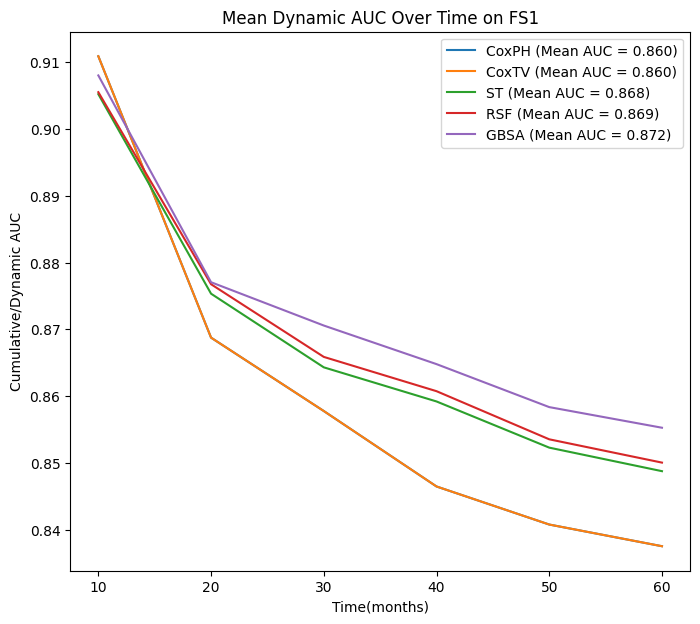

In [70]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sksurv.metrics import cumulative_dynamic_auc

# 特征子集
dataset_name = 'FS1'
# 模型名称列表
model_names = ['CoxPH','CoxTV', 'ST', 'RSF', 'GBSA']

# 确定times
times = np.linspace(10 + 1e-6, 60 - 1e-6, 6)

# 初始化存储每个模型的AUCs的字典
aucs = {model_name: [] for model_name in model_names}

# 初始化用于 IPCW 检查的存储
ipcw_support_problems = []

# 遍历每一折
for fold_number in range(1, 6):
    # 加载测试集
    test_file_path = os.path.join(save_path, f'test_fold_{fold_number}.pkl')
    with open(test_file_path, 'rb') as f:
        test_data = pickle.load(f)

    # 提取特征和目标变量
    X_test = test_data[FS1]
    y_test_event = test_data['event'].astype(bool)
    y_test_time = test_data['time']

    # 将目标变量转换为结构化数组
    y_test = np.array(list(zip(y_test_event, y_test_time)),
                      dtype=[('event', bool), ('time', float)])

    # 加载训练集的生存信息（计算 AUC 需要训练集的信息）
    train_file_path = os.path.join(save_path, f'train_fold_{fold_number}.pkl')
    with open(train_file_path, 'rb') as f:
        train_data = pickle.load(f)

    y_train_event = train_data['event'].astype(bool)
    y_train_time = train_data['time']

    y_train = np.array(list(zip(y_train_event, y_train_time)),
                       dtype=[('event', bool), ('time', float)])
    
    
    # 合并数据（供 CoxPHFitter 使用）
    test_combined = pd.concat([test_data[['time', 'event']], X_test], axis=1)  


    # 转换为 episodic format（供 CoxTV 使用）
    # 检查并清理数据
    required_columns = ['time', 'event']
    test_data = check_and_clean_data(test_data, required_columns)

    # 检查并添加唯一的 ID 列
    if 'id' not in test_data.columns:
        test_data['id'] = np.arange(len(test_data))    
    
    episodic_test = to_episodic_format(
        pd.concat([test_data[['time', 'event', 'id']], X_test], axis=1),
        duration_col="time", event_col="event", id_col="id"
    )

    # 遍历每个模型
    for model_name in model_names:
        # 加载模型
        model_filename = f"{dataset_name}_{model_name}_fold{fold_number}.pkl"
        model_filepath = os.path.join(models_save_path, model_filename)
        
        with open(model_filepath, 'rb') as f:
            model = pickle.load(f) 
                       
            
        
        # 获取测试集的风险评分
        if model_name == 'CoxPH':
            risk_scores = model.predict_partial_hazard(test_combined)
        elif model_name=='CoxTV':
            risk_scores_coxtv_raw = model.predict_partial_hazard(episodic_test)
            episodic_test['partial_hazard'] = risk_scores_coxtv_raw
            aggregated_risk_scores_coxtv = episodic_test.groupby('id')['partial_hazard'].mean()
            risk_scores= aggregated_risk_scores_coxtv.values   
        else:
            risk_scores = model.predict(X_test)
        
        # 计算 IPCW 权重，如果审查生存函数达到零，则存储
        try:
            auc, mean_auc = cumulative_dynamic_auc(y_train, y_test, risk_scores, times)
            aucs[model_name].append(auc)
        except ValueError as e:
            ipcw_support_problems.append((fold_number, model_name, str(e)))          


# 计算每个模型的平均AUC五折的每个时间点上的平均值
mean_aucs1 = {model_name: np.mean(aucs[model_name], axis=0) for model_name in model_names}

overall_mean_aucs1 = pd.DataFrame({
    'Model': model_name,
    'Average_AUC': np.mean(mean_auc)
} for model_name, mean_auc in mean_aucs1.items())

# 绘制Time-dependent AUC曲线并添加数据标签
plt.figure(figsize=(8, 7))
for model_name, mean_auc in mean_aucs1.items():
    plt.plot(times, mean_auc, label=f'{model_name} (Mean AUC = {np.mean(mean_auc):.3f})')
#     # 添加数据标签
#     for i, auc_value in enumerate(mean_auc):
#         plt.text(times[i], auc_value, f'{auc_value:.3f}', fontsize=9, ha='center', va='bottom')

plt.xlabel('Time(months)')
plt.ylabel('Cumulative/Dynamic AUC')
plt.title("Mean Dynamic AUC Over Time on FS1")
plt.legend(loc="upper right")  # 设置图例位置为右上角
plt.show()

In [67]:
overall_mean_aucs1

,Model,Average_AUC
0,CoxPH,0.860356
1,CoxTV,0.860356
2,ST,0.867511
3,RSF,0.868735
4,GBSA,0.872336


## 合理性分析 KM生存曲线

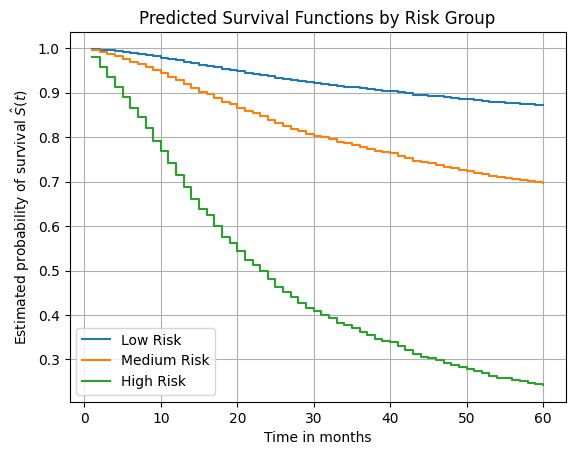

In [68]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.util import Surv


dataset_name = 'FS1'
model_name = 'GBSA'

# 用于存储每组的生存函数预测
surv_funcs_groups = {0: [], 1: [], 2: []}
time_points = None  # 存储时间点

# 初始化一个空的DataFrame来收集数据
survival_data = pd.DataFrame()

for fold_number in range(1, 6):
    # 加载测试集
    test_file_path = os.path.join(save_path, f'test_fold_{fold_number}.pkl')
    with open(test_file_path, 'rb') as f:
        test_data = pickle.load(f)
        
    X_test = test_data[FS1]
    y_test_event = test_data['event'].astype(bool)
    y_test_time = test_data['time']
    y_test = Surv.from_arrays(event=y_test_event, time=y_test_time)

    # 加载模型
    model_filename = f"{dataset_name}_{model_name}_fold{fold_number}.pkl"
    model_filepath = os.path.join(models_save_path, model_filename)
    with open(model_filepath, 'rb') as f:
        loaded_model = pickle.load(f)

    # 预测风险分数
    risk_scores = loaded_model.predict(X_test)

    # 确定分组阈值
    threshold_low = np.percentile(risk_scores, 33)
    threshold_high = np.percentile(risk_scores, 66)

    # 根据阈值将样本分组
    groups = np.digitize(risk_scores, [threshold_low, threshold_high])

    # 预测生存函数
    pred_surv_funcs = loaded_model.predict_survival_function(X_test)
    if fold_number == 1:
        time_points = pred_surv_funcs[0].x  # 保存时间点数据

    # 存储每组的生存函数预测
    for i in range(3):
        surv_funcs_groups[i].extend([func.y for func, g in zip(pred_surv_funcs, groups) if g == i])
        
        
    # 将风险分数、生存时间、事件发生与风险组合并为一个DataFrame
    fold_df = pd.DataFrame({
        'time': y_test_time,
        'event': y_test_event,
        'group': groups
    })

    # 将当前折叠的数据添加到总的DataFrame中
    survival_data = pd.concat([survival_data, fold_df], ignore_index=True)

# 计算每组的平均生存函数
average_surv_funcs = {}
for i in range(3):
    average_surv_funcs[i] = np.mean(surv_funcs_groups[i], axis=0)

# 绘制每组的平均生存曲线
plt.figure()
risk_group_labels = ["Low Risk", "Medium Risk", "High Risk"]
for i in range(3):
    plt.step(time_points, average_surv_funcs[i], where="post", label=risk_group_labels[i])

plt.title("Predicted Survival Functions by Risk Group")
plt.ylabel("Estimated probability of survival $\hat{S}(t)$")
plt.xlabel("Time in months")
plt.legend()
plt.grid(True)
plt.show()

In [69]:
from lifelines.statistics import multivariate_logrank_test

# 进行Log-rank检验
results = multivariate_logrank_test(survival_data['time'], survival_data['group'], survival_data['event'], alpha=0.95)

# 设置Pandas显示格式，确保至少显示三位小数
pd.set_option('display.float_format', '{:.4f}'.format)

# 输出检验结果
print(results.summary)

   test_statistic      p  -log2(p)
0       1211.9200 0.0000  874.2155
